## Generar Modelo para competencia Kaggle de Deep Learning - MIAD

### Cargar librerias

In [1]:
# Cargar librerias
import numpy as np
import random
import os

import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras 

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

2025-04-17 15:19:00.501002: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-17 15:19:00.501600: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-17 15:19:00.503699: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-17 15:19:00.508899: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744921140.517299  273387 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744921140.51

### Cargar Datos

In [2]:
# Cargar Datos de entrenamiento
df_train = pd.read_csv('train_data.csv')

# vista previa
df_train.head()

,ID,Bankruptcy,Realized.Sales.Gross.Profit.Growth.Rate,Operating.Expense.Rate,Operating.Profit.Per.Share..Yuan...,Gross.Profit.to.Sales,Tax.rate..A.,Current.Liability.to.Liability,Continuous.Net.Profit.Growth.Rate,Long.term.Liability.to.Current.Assets,Total.assets.to.GNP.price,Current.Liabilities.Equity,CFO.to.Assets,Current.Liability.to.Current.Assets,Persistent.EPS.in.the.Last.Four.Seasons,Cash.Total.Assets,Inventory.Working.Capital,Net.Value.Per.Share..B.,Current.Assets.Total.Assets,Net.Worth.Turnover.Rate..times.,Interest.Coverage.Ratio..Interest.expense.to.EBIT.,Equity.to.Liability,Operating.profit.Paid.in.capital,No.credit.Interval,Interest.bearing.debt.interest.rate,Net.Income.to.Stockholder.s.Equity,Quick.Ratio,Cash.Flow.to.Sales,Equity.to.Long.term.Liability,Working.Capital.Equity,After.tax.net.Interest.Rate,Current.Liability.to.Assets,Net.Value.Per.Share..C.,Revenue.per.person,Borrowing.dependency,Operating.Profit.Rate,Long.term.fund.suitability.ratio..A.,Pre.tax.net.Interest.Rate,After.tax.Net.Profit.Growth.Rate,Operating.profit.per.person,Realized.Sales.Gross.Margin,Cash.Current.Liability,Current.Liability.to.Equity,Total.expense.Assets,Current.Asset.Turnover.Rate,Fixed.Assets.Turnover.Frequency,ROA.B..before.interest.and.depreciation.after.tax,Quick.Asset.Turnover.Rate,Debt.ratio..,Retained.Earnings.to.Total.Assets,Total.debt.Total.net.worth,Fixed.Assets.to.Assets,Total.Asset.Growth.Rate,Inventory.and.accounts.receivable.Net.value,Net.Income.Flag,Per.Share.Net.profit.before.tax..Yuan...,Continuous.interest.rate..after.tax.,Liability.Assets.Flag,Working.Capital.to.Total.Assets,Degree.of.Financial.Leverage..DFL.,Operating.Gross.Margin,Contingent.liabilities.Net.worth,Operating.Profit.Growth.Rate,Cash.Flow.to.Liability,Quick.Assets.Total.Assets
0,1,0,0.087661,1.900349e-04,0.131094,0.583345,0.000000,0.815892,0.395719,0.089276,0.000489,0.281141,0.665066,0.066387,0.249061,0.140873,0.431139,0.191173,0.297644,0.024285,0.725172,0.049712,0.078449,0.740116,4.721018e-04,0.860095,0.002406,0.791956,0.217159,0.828121,0.898076,0.059736,0.124798,0.026398,0.437043,0.999062,0.012959,0.861571,0.711694,0.379531,0.620656,0.060332,0.359905,0.009406,4.288144e-03,2.237306e+09,0.586047,5.901952e-05,0.258266,0.942833,0.038263,0.833613,7.620685e+10,0.349014,1,0.223720,0.801737,0,0.839112,0.036551,0.591350,0.007401,0.913175,0.489822,0.138714
1,2,0,0.021892,5.371576e-04,0.086167,0.695478,0.209649,0.768636,0.163505,0.000000,0.018823,0.304522,0.602284,0.038972,0.262613,0.137160,0.322354,0.391213,0.792984,0.067274,0.567918,0.139836,0.343944,0.623515,3.115766e+07,0.819082,0.058836,0.769482,0.211842,0.698552,0.860089,0.139002,0.173522,0.020867,0.502984,0.999227,0.006648,0.819186,0.808840,0.609301,0.694097,0.020014,0.427782,0.142211,1.927473e-04,2.537529e-03,0.561915,1.385376e-03,0.141277,0.962914,0.000594,0.173683,1.003696e+06,0.377744,1,0.324763,0.791203,0,0.908450,0.126752,0.766066,0.020514,0.849241,0.550247,0.704211
2,3,0,0.102249,2.178329e-04,0.157755,0.766934,0.272061,0.643316,0.181571,0.010180,0.020323,0.398060,0.571545,0.102786,0.264661,0.166239,0.416704,0.170455,0.494234,0.015204,0.607235,0.038620,0.100376,0.754268,2.301743e-04,0.870927,0.103190,0.721866,0.217448,0.709177,0.820039,0.165287,0.267027,0.031782,0.556357,0.999100,0.002282,0.857014,0.662214,0.501465,0.566415,0.035103,0.322577,0.016698,5.061000e-03,5.296747e-04,0.609651,9.989531e-03,0.144202,0.957835,0.002228,0.170233,2.675561e+05,0.463732,1,0.360892,0.803126,0,0.865943,0.018152,0.687211,0.004363,0.865814,0.447168,0.398086
3,4,0,0.029972,4.915756e+10,0.249279,0.611580,0.288357,0.752782,0.409196,0.018603,0.051621,0.569484,0.597299,0.020687,0.323814,0.106693,0.316508,0.283815,0.568482,0.055694,0.554564,0.041208,0.301615,0.647968,2.560633e-04,0.895735,0.009577,0.709324,0.099247,0.834494,0.861415,0.234282,0.458725,0.021961,0.321767,0.999235,0.013867,0.816414,0.736790,0.546017,0.630496,0.003352,0.353371,0.106083,1.361321e+09,3.982768e-04,0.689417,4.283614e+09,0.151899,0.939676,0.048031

### Separar variable objetivo  y predictoras

In [3]:
# Se parar variable predictoras
x = df_train.drop(columns='Bankruptcy')

# Se parar variable objetivo 
y = df_train['Bankruptcy']

### Análisis preliminar de variables

In [4]:
# Tamaño del data set x
print("Tamaño del data set: \n", x.shape, "\n")

# Tipos de datos en el data set x
print("Tipos de datos: \n", x.dtypes.value_counts())

Tamaño del data set: 
 (2050, 64) 

Tipos de datos: 
 float64    61
int64       3
Name: count, dtype: int64


In [5]:
# Tamaño del data set y
print("Tamaño del data set: \n", y.shape, "\n")

# Tipo de dato y, distribucion de clases
print("Tipo de dato y distribucion de clases: \n", y.value_counts())

Tamaño del data set: 
 (2050,) 

Tipo de dato y distribucion de clases: 
 Bankruptcy
0    1988
1      62
Name: count, dtype: int64


In [6]:
# Contar Na x
display(x.isna().sum().sum())

# Contar Na y
display(y.isna().sum())

np.int64(0)

np.int64(0)

In [7]:
# Datos estadisticos descriptivos de x
x.describe().round(2)

,ID,Realized.Sales.Gross.Profit.Growth.Rate,Operating.Expense.Rate,Operating.Profit.Per.Share..Yuan...,Gross.Profit.to.Sales,Tax.rate..A.,Current.Liability.to.Liability,Continuous.Net.Profit.Growth.Rate,Long.term.Liability.to.Current.Assets,Total.assets.to.GNP.price,Current.Liabilities.Equity,CFO.to.Assets,Current.Liability.to.Current.Assets,Persistent.EPS.in.the.Last.Four.Seasons,Cash.Total.Assets,Inventory.Working.Capital,Net.Value.Per.Share..B.,Current.Assets.Total.Assets,Net.Worth.Turnover.Rate..times.,Interest.Coverage.Ratio..Interest.expense.to.EBIT.,Equity.to.Liability,Operating.profit.Paid.in.capital,No.credit.Interval,Interest.bearing.debt.interest.rate,Net.Income.to.Stockholder.s.Equity,Quick.Ratio,Cash.Flow.to.Sales,Equity.to.Long.term.Liability,Working.Capital.Equity,After.tax.net.Interest.Rate,Current.Liability.to.Assets,Net.Value.Per.Share..C.,Revenue.per.person,Borrowing.dependency,Operating.Profit.Rate,Long.term.fund.suitability.ratio..A.,Pre.tax.net.Interest.Rate,After.tax.Net.Profit.Growth.Rate,Operating.profit.per.person,Realized.Sales.Gross.Margin,Cash.Current.Liability,Current.Liability.to.Equity,Total.expense.Assets,Current.Asset.Turnover.Rate,Fixed.Assets.Turnover.Frequency,ROA.B..before.interest.and.depreciation.after.tax,Quick.Asset.Turnover.Rate,Debt.ratio..,Retained.Earnings.to.Total.Assets,Total.debt.Total.net.worth,Fixed.Assets.to.Assets,Total.Asset.Growth.Rate,Inventory.and.accounts.receivable.Net.value,Net.Income.Flag,Per.Share.Net.profit.before.tax..Yuan...,Continuous.interest.rate..after.tax.,Liability.Assets.Flag,Working.Capital.to.Total.Assets,Degree.of.Financial.Leverage..DFL.,Operating.Gross.Margin,Contingent.liabilities.Net.worth,Operating.Profit.Growth.Rate,Cash.Flow.to.Liability,Quick.Assets.Total.Assets
count,2050.00,2050.00,2.050000e+03,2050.00,2050.00,2050.00,2050.00,2050.00,2.050000e+03,2.050000e+03,2050.00,2050.00,2050.00,2050.00,2050.00,2050.00,2050.00,2050.00,2050.00,2050.00,2050.00,2050.00,2050.00,2.050000e+03,2050.00,2.050000e+03,2050.00,2050.00,2050.00,2050.00,2050.00,2050.00,2050.00,2050.00,2050.00,2050.00,2050.00,2050.00,2050.00,2050.00,2.050000e+03,2050.00,2050.00,2.050000e+03,2.050000e+03,2050.00,2.050000e+03,2050.00,2050.00,2.050000e+03,2050.00,2.050000e+03,2050.00,2050.0,2050.00,2050.00,2050.00,2050.00,2050.00,2050.00,2050.00,2050.00,2050.00,2050.00
mean,1276.68,0.05,1.143592e+10,0.17,0.66,0.15,0.79,0.29,9.294008e+07,1.131508e+06,0.40,0.64,0.06,0.30,0.17,0.35,0.26,0.57,0.08,0.62,0.09,0.17,0.68,5.888515e+07,0.86,4.005590e+08,0.72,0.18,0.77,0.84,0.15,0.26,4319.06,0.45,1.00,0.02,0.83,0.73,0.47,0.66,3.175659e+07,0.40,0.06,5.272116e+09,4.907951e+09,0.61,9.853138e+09,0.17,0.94,1.063234e+06,0.31,2.488923e+10,0.47,1.0,0.25,0.81,0.00,0.84,0.06,0.66,0.02,0.87,0.53,0.46
std,733.77,0.04,6.637064e+10,0.07,0.07,0.17,0.19,0.09,1.985623e+09,3.534875e+07,0.09,0.08,0.05,0.09,0.16,0.09,0.09,0.22,0.06,0.07,0.08,0.08,0.06,1.366092e+09,0.04,1.807937e+10,0.06,0.08,0.05,0.03,0.09,0.09,195550.62,0.09,0.00,0.04,0.04,0.05,0.09,0.07,7.739081e+08,0.09,0.06,4.620072e+10,4.095018e+10,0.09,5.964096e+10,0.09,0.02,3.442681e+07,0.22,8.869889e+10,0.08,0.0,0.09,0.04,0.02,0.06,0.05,0.06,0.02,0.03,0.08,0.21
min,1.00,0.01,0.000000e+00,0.03,0.49,0.00,0.02,0.13,0.000000e+00,0.000000e+00,0.24,0.21,0.00,0.08,0.00,0.21,0.09,0.00,0.00,0.00,0.01,0.02,0.56,0.000000e+00,0.00,0.000000e+00,0.62,0.04,0.51,0.75,0.00,0.10,0.00,0.30,0.98,0.00,0.75,0.51,0.29,0.42,0.000000e+00,0.26,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.00,0.66,0.000000e+00,0.00,0.000000e+00,0.33,1.0,0.01,0.73,0.00,0.63,0.00,0.45,0.00,0.81,0.08,0.00
25%,645.25,0.02,0.000000e+00,0.11,0.61,0.00,0.68,0.22,0.000000e+00,0.000000e+00,0.33,0.59,0.02,0.23,0.06,0.28,0.19,0.41,0.03,0.57,0.04,0.11,0.63,0.000000e+00,0.84,1.000000e-02,0.67,0.12,0.74,0.81,0.08,0.19,0.02,0.38,1.00,0.01,0.80,0.69,0.40,0.61,0.000000e+00,0.34,0.02,0.000000e+00,0.000000e+00,0.55,0.000000e+00,0.10,0.94,1.000000e-02,0.13,7.606215e+05,0.41,1.0,0.18,0.78,0.00,0.80,0.03,0.61,0.01,0.85,0.46

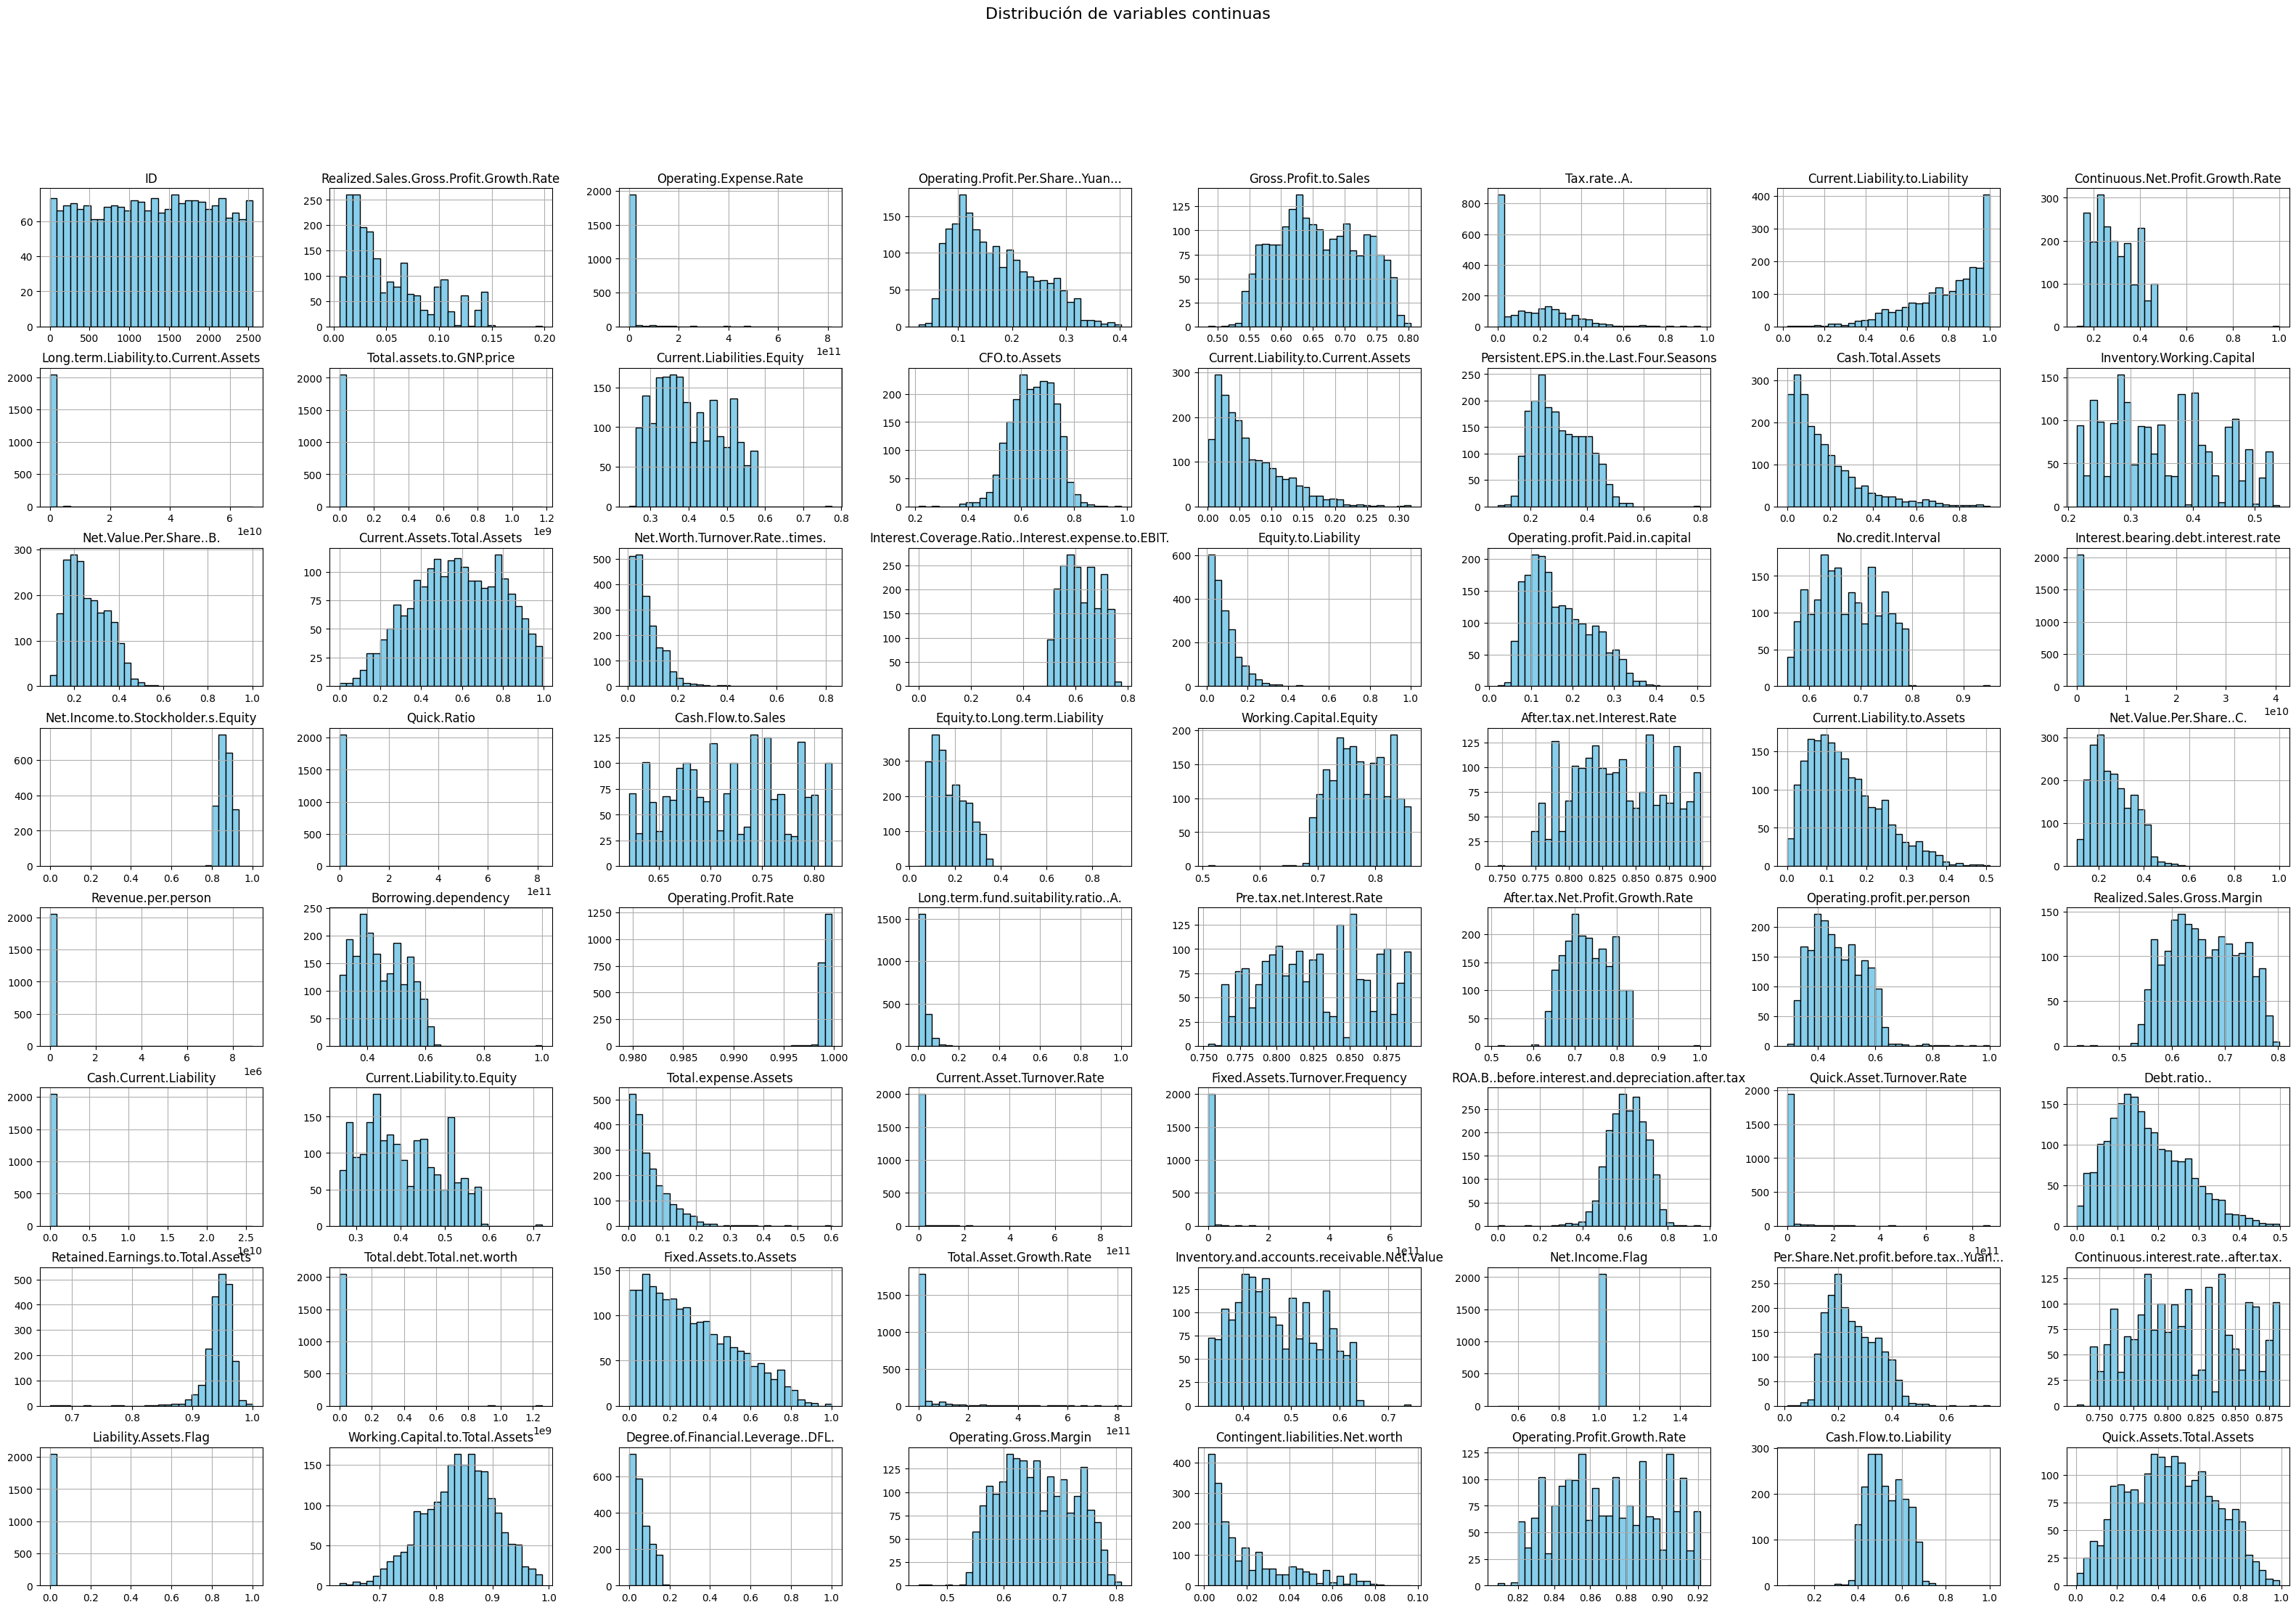

In [8]:
# Histogramas de las variables continuas
x.hist(bins=30, figsize=(40, 25), color='skyblue', edgecolor='black')
plt.suptitle("Distribución de variables continuas", fontsize=16)
plt.show()

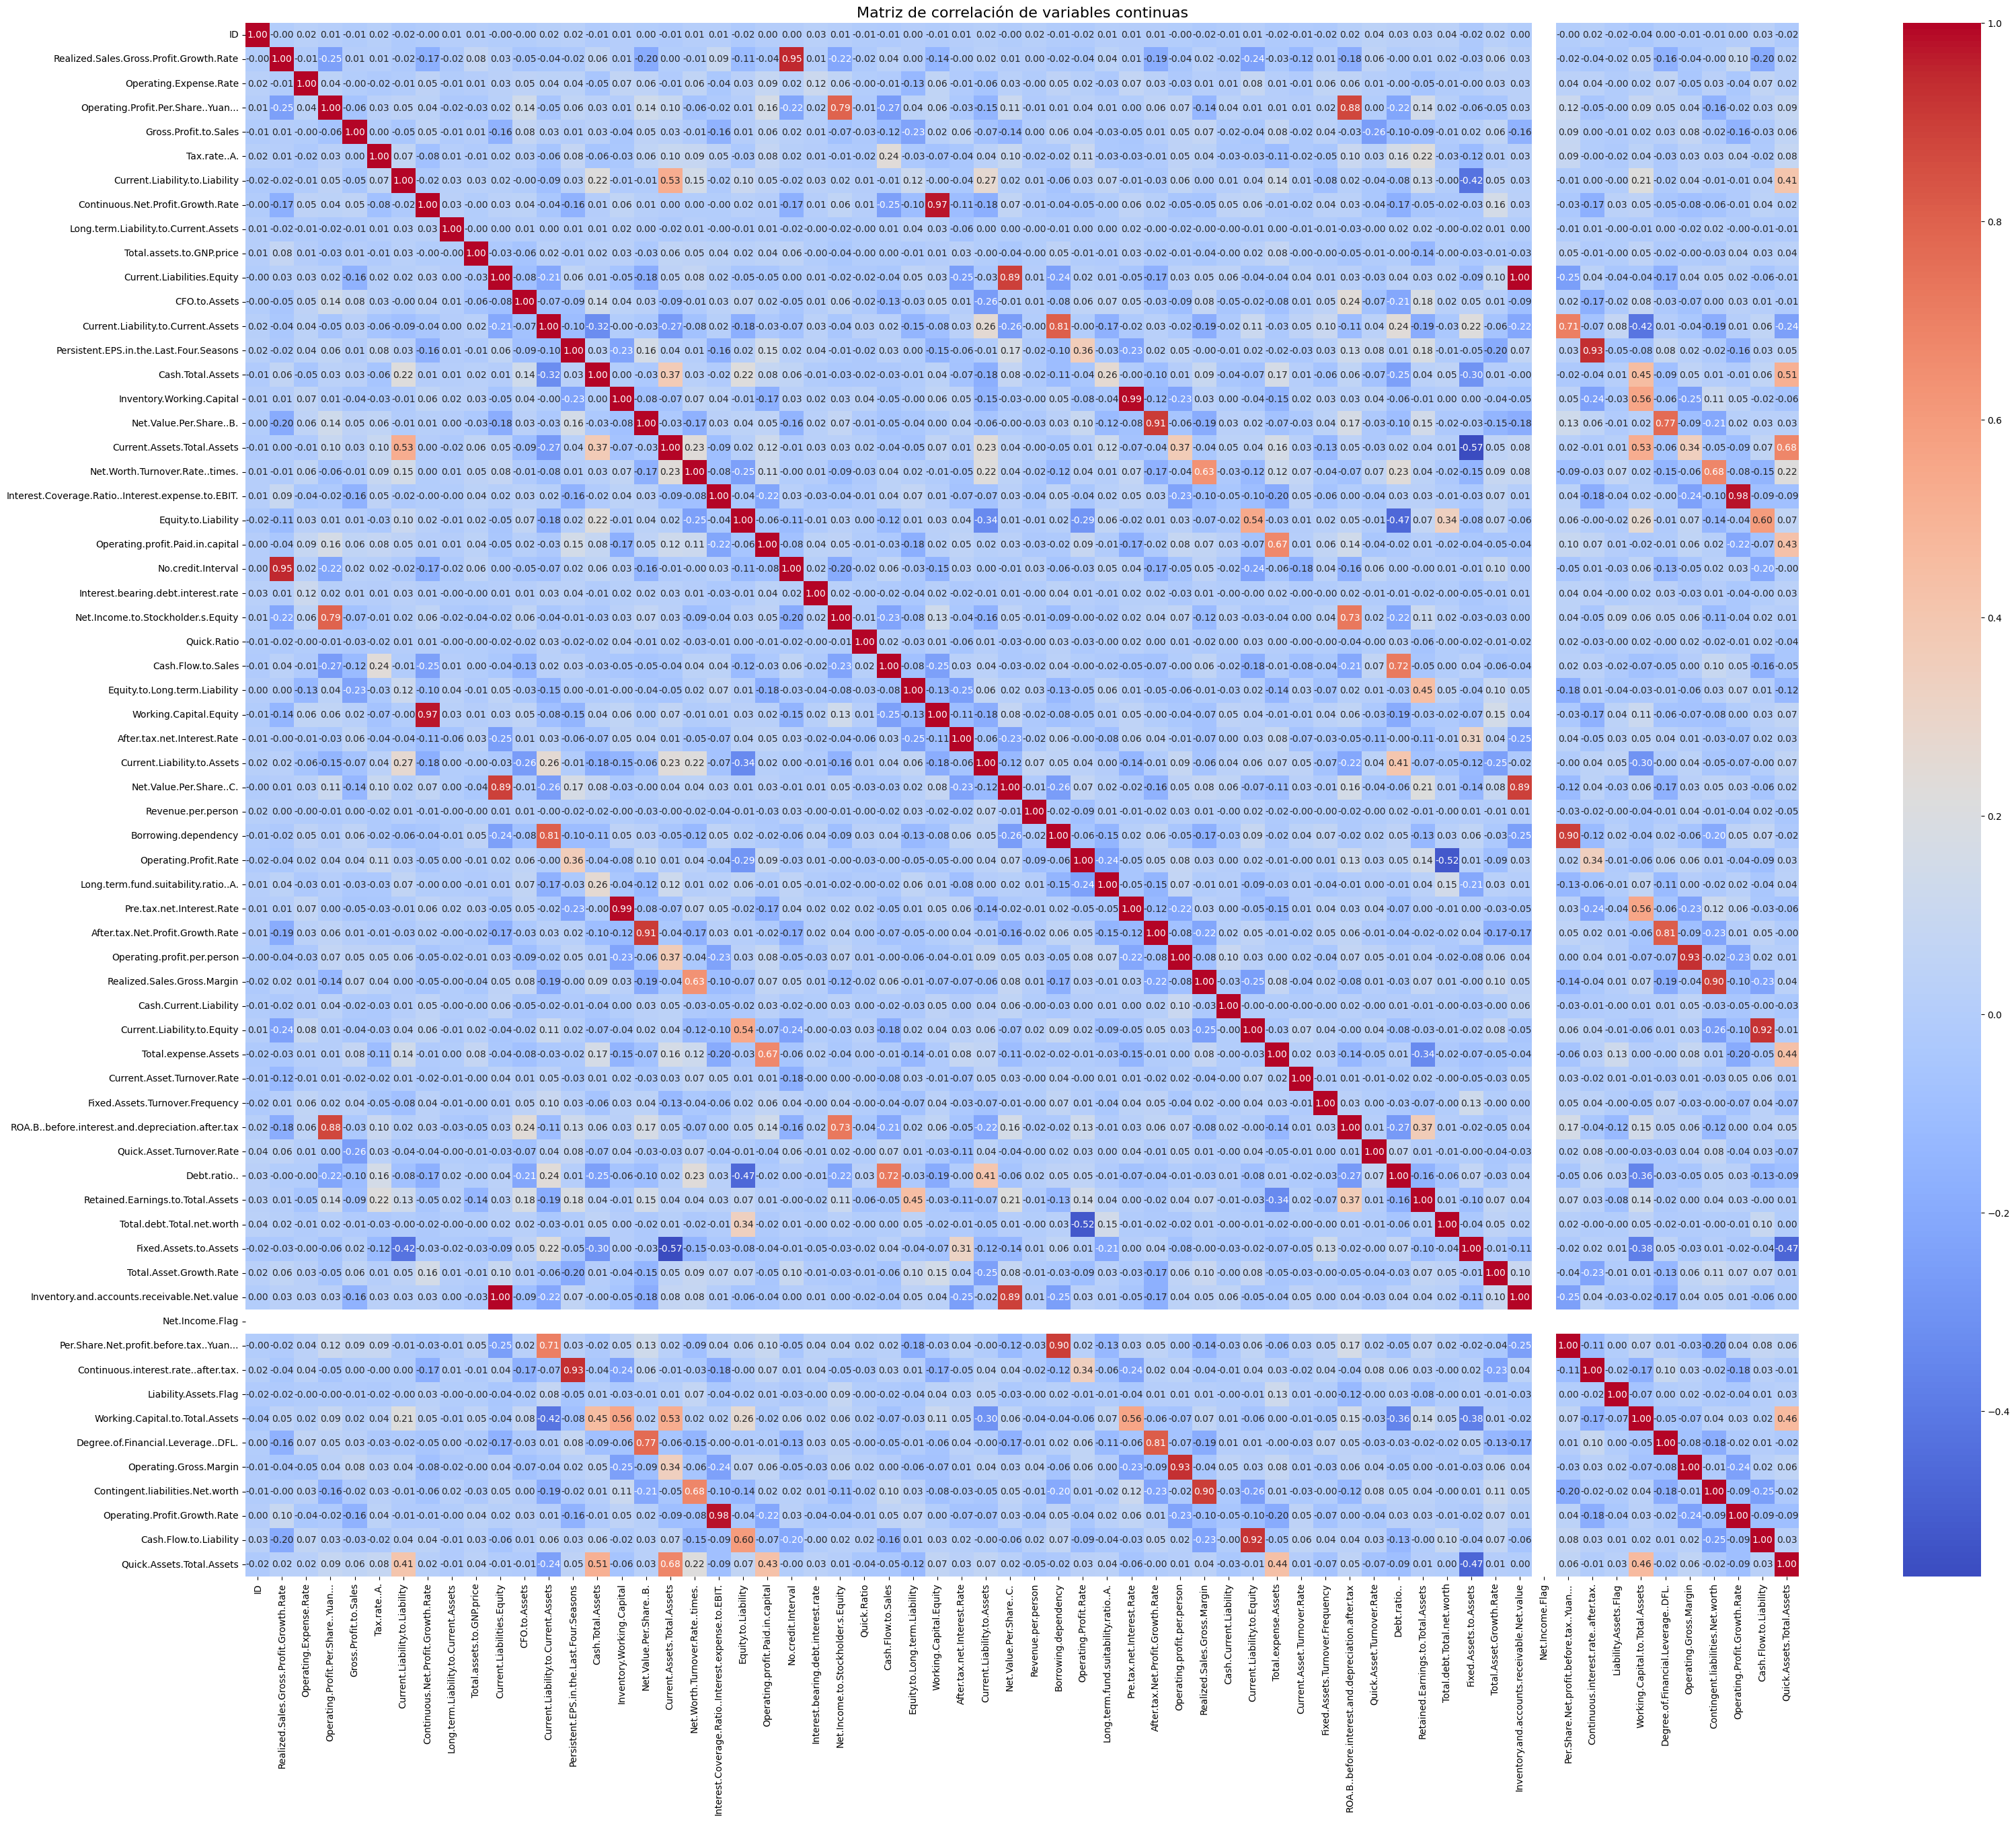

In [9]:
# Correlograma (matriz de correlación)
plt.figure(figsize=(40, 30))
correlation_matrix = x.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de correlación de variables continuas", fontsize=16)
plt.show()

/tmp/ipykernel_273387/3773259607.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


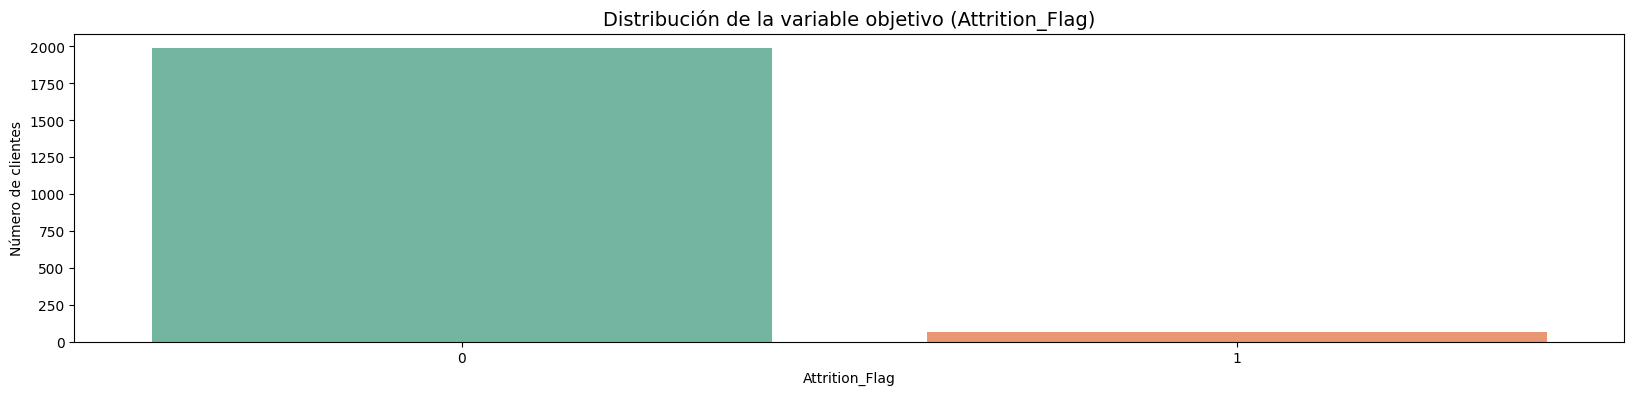

In [10]:
# Distribución de la variable objetivo
plt.figure(figsize=(20, 4))
sns.countplot(x=y, palette="Set2")
plt.title("Distribución de la variable objetivo (Attrition_Flag)", fontsize=14)
plt.xlabel("Attrition_Flag")
plt.ylabel("Número de clientes")
plt.xticks(rotation=0)
plt.show()

### Estimación del modelo usando una red neuronal con keras

In [11]:
# Se separan los datos en test y train
X_train_full, X_test, y_train_full, y_test = train_test_split(x, y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

# Se realiza el escalamiento de los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Transformar a formato NumPy
X_train = np.array(X_train, dtype=np.float32)
X_valid = np.array(X_valid, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)

y_train = np.array(y_train, dtype=np.float32)
y_valid = np.array(y_valid, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

In [12]:
# Cracion de la red 
model = keras.models.Sequential()

model.add(keras.layers.Dense(900, activation="relu", input_shape=(64,)))
model.add(keras.layers.Dense(900, activation="relu"))
model.add(keras.layers.Dense(900, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

/home/maro/Documents/uniAndes/deepLearning/vDeepL/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1744921146.141291  273387 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1744921146.143149  273387 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [13]:
# Generamos un resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 900)            │        58,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 900)            │       810,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 900)            │       810,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           901 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,681,201 (6.41 MB)

 Trainable params: 1,681,201 (6.41 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compilacion del modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9719 - loss: 0.2492 - val_accuracy: 0.9636 - val_loss: 2086444416.0000
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9794 - loss: 0.0720 - val_accuracy: 0.9636 - val_loss: 3169089536.0000
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9826 - loss: 0.0508 - val_accuracy: 0.9532 - val_loss: 3807557888.0000
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9804 - loss: 0.0454 - val_accuracy: 0.9532 - val_loss: 5870225920.0000
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9852 - loss: 0.0332 - val_accuracy: 0.9558 - val_loss: 6574312960.0000
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9883 - loss: 0.0282 - val_accuracy: 0.9636 - val_loss: 7741966848.0000
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9878 - loss: 0.0198 - val_accuracy: 0.9532 - val_loss: 6619648512.0000
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc

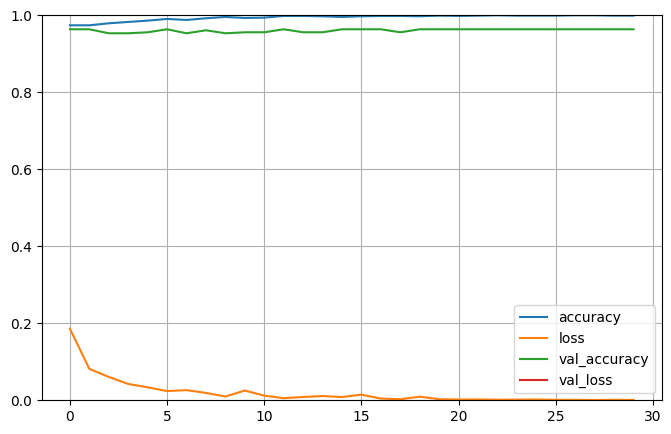

In [16]:
# graficar el entrenamiento del modelo
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### Evaluacion del modelo

In [17]:
# evaluacion
test_loss, test_acc = model.evaluate(X_test, y_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9616 - loss: 0.5630


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
El accuracy del modelo es: 0.9610136452241715
La precisión del modelo es: 0.3333333333333333
La matriz de confusión es: 
[[491   4]
 [ 16   2]]
El AUC del modelo es: 0.8361391694725028


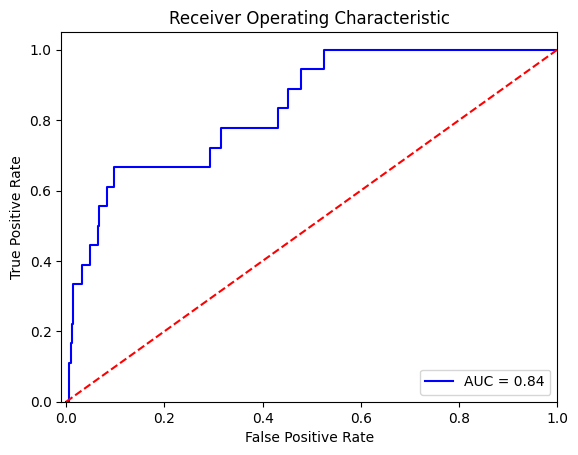

In [18]:
# Hallar probabilidades y clasificación que predice el modelo con threshold de 0.5
predicciones = model.predict(X_test)
y_pred = [round(x[0]) for x in predicciones]
# Imprimir métricas de desempeño
print("El accuracy del modelo es: "+str(accuracy_score(y_true=y_test, y_pred=y_pred)))
print("La precisión del modelo es: "+str(precision_score(y_true=y_test, y_pred=y_pred)))
print("La matriz de confusión es: \n"+str(confusion_matrix(y_true=y_test, y_pred=y_pred)))
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicciones, pos_label=1)
AUCRegLog=metrics.auc(fpr, tpr)
print("El AUC del modelo es: "+str(AUCRegLog))

# Graficar curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCRegLog)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Prediccion de nuevos datos

In [19]:
# Cargar Datos de prueba
df_test = pd.read_csv('test_data.csv')

# vista previa
df_test.head()

,ID,Realized.Sales.Gross.Profit.Growth.Rate,Operating.Expense.Rate,Operating.Profit.Per.Share..Yuan...,Gross.Profit.to.Sales,Tax.rate..A.,Current.Liability.to.Liability,Continuous.Net.Profit.Growth.Rate,Long.term.Liability.to.Current.Assets,Total.assets.to.GNP.price,Current.Liabilities.Equity,CFO.to.Assets,Current.Liability.to.Current.Assets,Persistent.EPS.in.the.Last.Four.Seasons,Cash.Total.Assets,Inventory.Working.Capital,Net.Value.Per.Share..B.,Current.Assets.Total.Assets,Net.Worth.Turnover.Rate..times.,Interest.Coverage.Ratio..Interest.expense.to.EBIT.,Equity.to.Liability,Operating.profit.Paid.in.capital,No.credit.Interval,Interest.bearing.debt.interest.rate,Net.Income.to.Stockholder.s.Equity,Quick.Ratio,Cash.Flow.to.Sales,Equity.to.Long.term.Liability,Working.Capital.Equity,After.tax.net.Interest.Rate,Current.Liability.to.Assets,Net.Value.Per.Share..C.,Revenue.per.person,Borrowing.dependency,Operating.Profit.Rate,Long.term.fund.suitability.ratio..A.,Pre.tax.net.Interest.Rate,After.tax.Net.Profit.Growth.Rate,Operating.profit.per.person,Realized.Sales.Gross.Margin,Cash.Current.Liability,Current.Liability.to.Equity,Total.expense.Assets,Current.Asset.Turnover.Rate,Fixed.Assets.Turnover.Frequency,ROA.B..before.interest.and.depreciation.after.tax,Quick.Asset.Turnover.Rate,Debt.ratio..,Retained.Earnings.to.Total.Assets,Total.debt.Total.net.worth,Fixed.Assets.to.Assets,Total.Asset.Growth.Rate,Inventory.and.accounts.receivable.Net.value,Net.Income.Flag,Per.Share.Net.profit.before.tax..Yuan...,Continuous.interest.rate..after.tax.,Liability.Assets.Flag,Working.Capital.to.Total.Assets,Degree.of.Financial.Leverage..DFL.,Operating.Gross.Margin,Contingent.liabilities.Net.worth,Operating.Profit.Growth.Rate,Cash.Flow.to.Liability,Quick.Assets.Total.Assets
0,5,0.055077,1.064430e-02,0.131220,0.657541,0.118122,0.771297,0.366505,0.018675,0.001246,0.453045,0.731175,0.019373,0.273790,0.238914,0.295080,0.227074,0.558055,0.149949,0.730613,0.079704,0.134164,0.698470,9.700062e-03,0.842721,0.016754,0.628088,0.195934,0.817657,0.861410,0.051188,0.355691,0.144345,0.347914,0.999106,0.028494,0.806371,0.683576,0.454405,0.753535,0.070885,0.433601,0.024892,0.001098,1.913361e-02,0.587070,2.622624e+08,0.074763,0.971278,0.031821,0.299588,4.977435e+11,0.521887,1,0.197730,0.786381,0,0.828263,0.024649,0.645659,0.052743,0.913336,0.557402,0.360819
1,14,0.020286,6.654634e+07,0.247104,0.746134,0.000000,0.697656,0.313514,0.126093,0.006813,0.392410,0.487331,0.130958,0.354180,0.051744,0.216778,0.284038,0.401756,0.015114,0.571889,0.085258,0.097177,0.618605,1.422782e-03,0.904631,0.021747,0.741007,0.119644,0.787292,0.897903,0.095775,0.224990,0.006332,0.480588,0.999205,0.023728,0.764005,0.766956,0.559362,0.567247,0.000981,0.465598,0.009212,0.000125,3.115498e+08,0.683727,1.712640e+05,0.216167,0.927488,0.023559,0.840040,8.029951e+09,0.459381,1,0.254563,0.850153,0,0.684968,0.075233,0.723486,0.003821,0.851428,0.584835,0.058199
2,16,0.040610,8.415991e+08,0.164832,0.718794,0.130647,0.398228,0.239002,0.122627,0.002547,0.303584,0.668666,0.028156,0.278875,0.103325,0.471672,0.295233,0.658779,0.205453,0.531512,0.010756,0.178870,0.672732,5.096783e-04,0.867462,0.040598,0.696528,0.129966,0.753129,0.889999,0.098996,0.154241,0.119123,0.398644,0.999184,0.003840,0.875799,0.769156,0.576095,0.774418,0.004445,0.283614,0.043711,0.000702,4.418705e-04,0.612578,2.765287e-03,0.216199,0.931815,0.019682,0.581230,2.127513e-04,0.376455,1,0.186794,0.808544,0,0.888590,0.078625,0.737439,0.070270,0.832491,0.409327,0.449420
3,26,0.067641,1.344961e-04,0.153400,0.741510,0.000000,0.842550,0.348637,0.007500,0.000219,0.377323,0.745009,0.193236,0.344062,0.059419,0.374497,0.429296,0.342299,0.042759,0.513494,0.071519,0.177312,0.716618,2.442912e+10,0.885059,0.039140,0.654452,0.120360,0.805825,0.817907,0.105942,0.230643,0.032392,0.581901,0.999026,0.009341,0.842046,0.827607,0.388898,0.659756,0.001023,0.436861,0.137866,0.002352,3.608444e-04,0.697683,5.061418e-03,0.109755,0.949141,0.031628,0.049803,8.788915e-05,0.444900,

In [20]:
# Se realiza el escalamiento de los datos
scaler = StandardScaler()
df_test_Scaler = scaler.fit_transform(df_test)

# Transformar a formato NumPy
df_test_Scaler = np.array(df_test_Scaler, dtype=np.float32)

In [21]:
# Precir nuevos datos
y_predict = model.predict(df_test)
y_predict = [round(x[0]) for x in y_predict]

resultado = pd.DataFrame({'id': df_test['ID'].values, 'prediccion': y_predict})
resultado.head()

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,id,prediccion
0,5,0
1,14,0
2,16,0
3,26,0
4,28,0


In [22]:
# Crear csv con las predicciones
resultado.rename(columns={'id':'ID'}, inplace=True)
resultado.rename(columns={'prediccion':'Bankruptcy'}, inplace=True)

resultado.to_csv('submission.csv', index=False)